In [1]:
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import itertools

In [2]:
RESULT_URL = "https://huggingface.co/henryscheible/experiment_results/raw/main/results_2022-11-05%2005%3A51%3A25.526349.json"

In [3]:
data = json.loads(requests.get(RESULT_URL).text)

In [4]:
data.keys()

dict_keys(['stereoset_binary_bert_classifieronly', 'stereoset_binary_bert_finetuned'])

In [5]:
checkpoints = [
    "stereoset_binary_bert_finetuned",
    "stereoset_binary_bert_classifieronly"
]
suffixes = [
    "250_0",
    "250_1",
    "250_2",
]

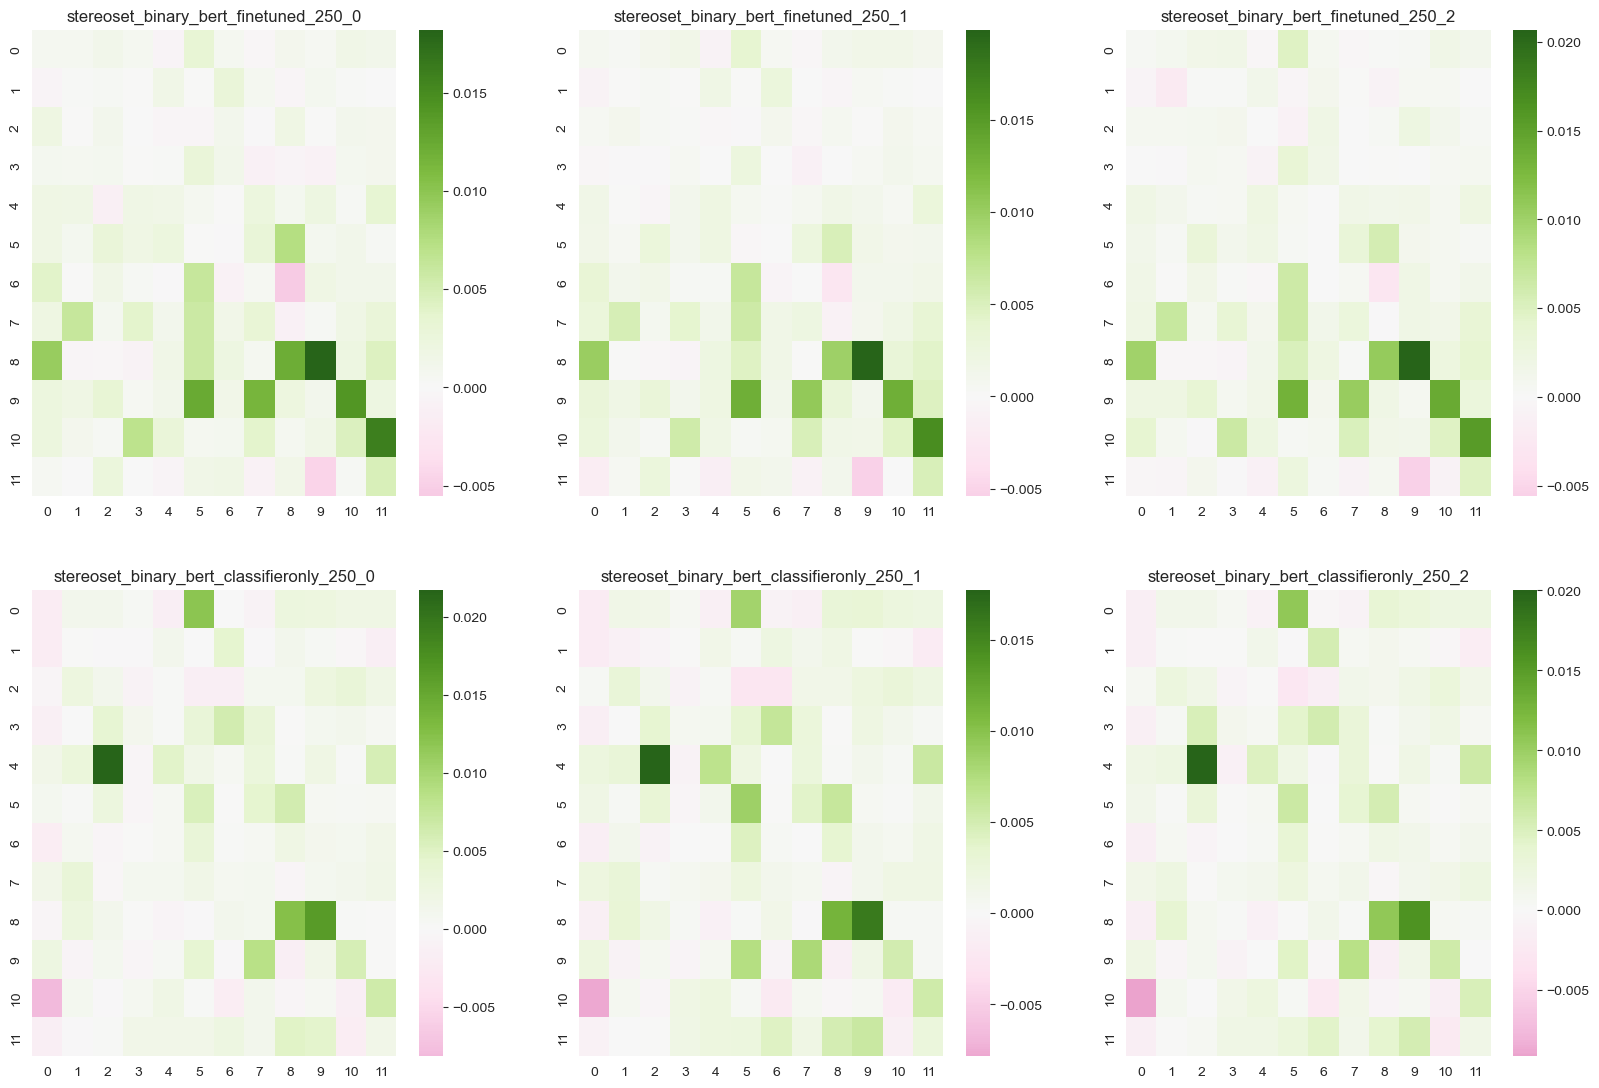

In [6]:
fig = plt.figure(figsize=(20, 20*2/3))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i, checkpoint in enumerate(checkpoints):
    for j, suffix in enumerate(suffixes):
        ax = fig.add_subplot(len(checkpoints), len(suffixes), len(suffixes)*i+j+1)
        ax.set_title(f"{checkpoint}_{suffix}")
        sns.heatmap(np.array(data[checkpoint][suffix]["contribs"]).reshape(12, 12), ax=ax, cmap="PiYG", center=0)
plt.show()

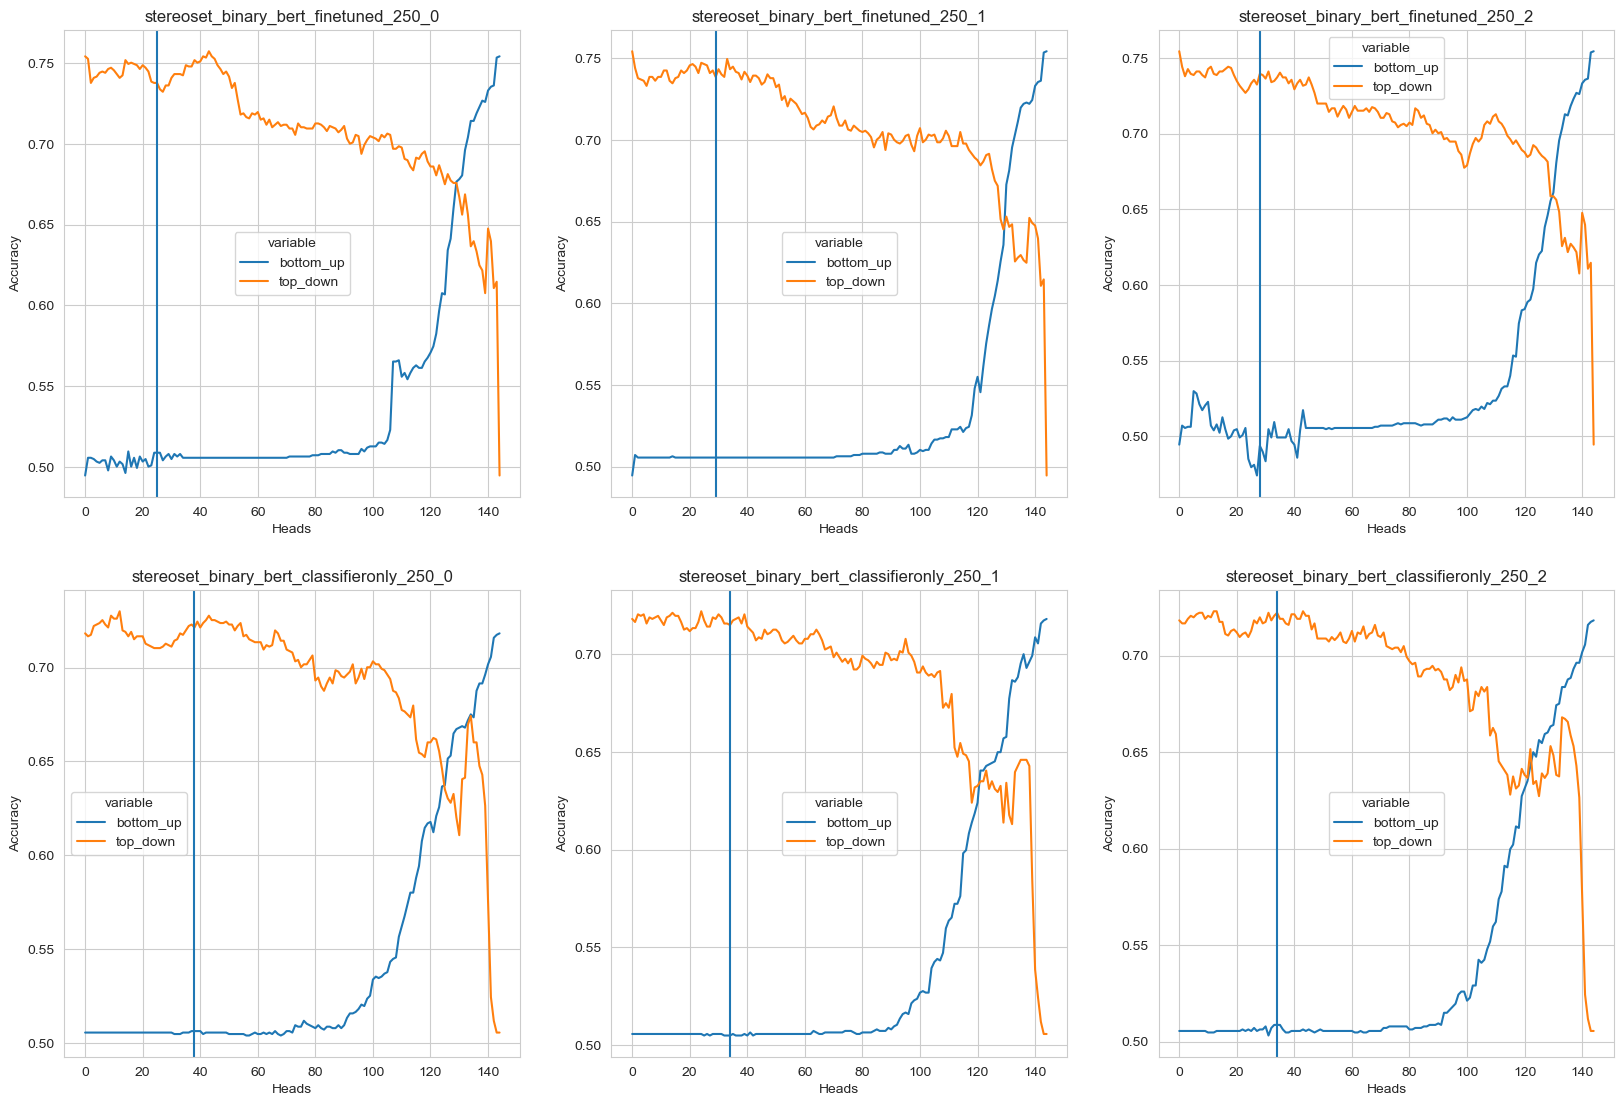

In [7]:
fig = plt.figure(figsize=(20, 20*2/3))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i, checkpoint in enumerate(checkpoints):
    for j, suffix in enumerate(suffixes):
        ax = fig.add_subplot(len(checkpoints), len(suffixes), len(suffixes)*i+j+1)
        df = pd.DataFrame({
            'heads': np.arange(145),
            'bottom_up': data[checkpoint][suffix]["bottom_up_results"],
            'top_down': data[checkpoint][suffix]["top_down_results"]
        })
        contribs = np.asarray(data[checkpoint][suffix]["contribs"])
        vline = (contribs < 0).sum()
        ax.set_title(f"{checkpoint}_{suffix}")
        sns.lineplot(x='heads', y='value', hue='variable',
                    data=pd.melt(df, ['heads']), ax=ax)
        ax.set(xlabel="Heads", ylabel="Accuracy")
        ax.axvline(vline, 0, 1)
plt.show()

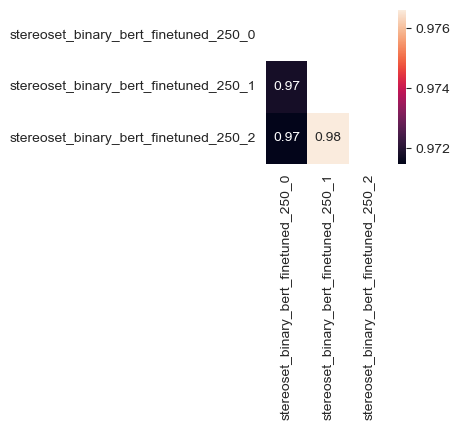

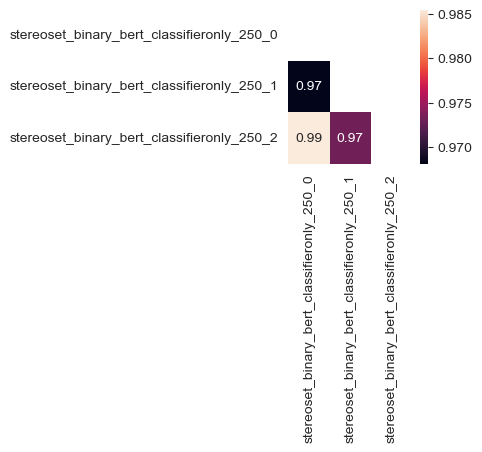

In [8]:

for i, checkpoint in enumerate(checkpoints):
    fig = plt.figure(figsize=(2, 2))
    df = pd.DataFrame({f"{checkpoint}_{suffix}": data[checkpoint][suffix]["contribs"] for suffix in suffixes})
    mask = np.triu(np.ones((3,3)))
    sns.heatmap(df.corr(), mask=mask, annot=True)
    plt.show()